**REINFORCEMENT LEARNING IN DYNAMIC PRICING** -VISHWANATH VINOD

*Dynamic pricing is related to price-fixing for perishable resources taking into account demand so that to maximize revenue or profit” (Fleischmann, Hall, Pyke, 2004).*

**INDEX**

1.   Policy Iteration:
        *   Synchronous
        *   In place


2.   Value Iteration
3.   Monte Carlo Method
       *   Every-Visit Monte Carlo Prediction
       *   First-Visit Monte Carlo Prediction


4.   Temporal Difference Learning
      - SARSA
      - Q-Learning
      - Double Q-Learning
5.  Policy  Gradient Algorithms
      - Reinforce      
      - Actor Critic Algorithms(A3C and SAC)
      - PPO
      - Dual Deterministic Policy  Gradient (DDPG)




**POLICY ITERATION**

In [ ]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

Creating an environment

In [ ]:
m,n =4, 4
S=[(r,c)for r in range (m) for c in range (n)]#all states
A=['N','S','E','W']
action_count=4
terminal=[(0,0),(3,3)]#terminal states
df=1#discount factor


Transition function

In [ ]:
def transn(s,a,s_next):
  r,c=s
  if(a=='N'):
    r=r if(r==0)else r-1
  if(a=='S'):
    r=r if(r==m-1)else r+1
  if(a=='E'):
    c=c if(c==n-1)else c+1
  if(a=='W'):
    c=c if(c==0)else c-1
  prob=1 if((r,c)==s_next) else 0# deterministic transition so next state is fixed given state and action p(s'|(s,a))=1
  reward=-1 #return probability and reward
  return prob,reward


**Policy**

*In this case let us assume equiprobable policy distribution*

π('N'|s)=0.25

π('S'|s)=0.25

π('E'|s)=0.25

π('W'|s)=0.25


In [ ]:
policy={s:{a:0.25 for a in A} for s in S}


Policy Evaluation

a)Synchhronous

  Update rule is given by

  $v_{k+1}(s)$ =Σπ(a|s) Σp(s',r|s,a) [r+$v_{k}(s')$]

= Prob of taking action a in state s * Expected return from state s by taking this action



In [ ]:
def evaluate(policy):
  theta=1e-4#convergence limit
  delta =1
  v={s:0 for s in S}#value function at each time step
  iter=0
  while(delta>=theta):
        iter+=1
        v_next={s:0 for s in S}#value function at next time step
        delta =0
        for s in S: #chooses one state
          if s in terminal:#if state is terminal stop
            continue
          for a in A:#choose an action to be executed at that state
            for s_next in S:
              prob,reward=transn(s,a,s_next)
              v_next[s]+=policy[s][a]*prob*(reward+df*v[s_next]) #expected value after executing action a* prob of executing action a
          delta =max(delta,abs(v_next[s]-v[s]) ) #if change in value is smaller than deta
        v=v_next.copy()#storing next timesteps value in v
  return v,iter
v,iter=evaluate(policy)
v={s: np.round(v[s],0)for s in S}
print(v)
print(iter)




{(0, 0): 0, (0, 1): -14.0, (0, 2): -20.0, (0, 3): -22.0, (1, 0): -14.0, (1, 1): -18.0, (1, 2): -20.0, (1, 3): -20.0, (2, 0): -20.0, (2, 1): -20.0, (2, 2): -18.0, (2, 3): -14.0, (3, 0): -22.0, (3, 1): -20.0, (3, 2): -14.0, (3, 3): 0}
173


b) In-place algorithm

In [ ]:
def evaluateip(policy):
  theta=1e-4
  v={s:0 for s in S}
  iter=0
  delta=1
  while(delta>=theta):
    iter+=1
    delta=0
    for s in S:
      vpres=0
      if s in terminal:
        continue
      for a in A:
        for s_next in S:
            prob,reward=transn(s,a,s_next)
            vpres+=policy[s][a]*prob*(reward+df*v[s_next])
      delta=max(delta,abs(v[s]-vpres))
      v[s]=vpres
  return v,iter
v,iter=evaluateip(policy)
v={s:np.round(v[s],0)for s in S}
print(iter)
print(v)






114
{(0, 0): 0, (0, 1): -14.0, (0, 2): -20.0, (0, 3): -22.0, (1, 0): -14.0, (1, 1): -18.0, (1, 2): -20.0, (1, 3): -20.0, (2, 0): -20.0, (2, 1): -20.0, (2, 2): -18.0, (2, 3): -14.0, (3, 0): -22.0, (3, 1): -20.0, (3, 2): -14.0, (3, 3): 0}


Policy Imporvement

In [ ]:
def improve(v):
  better={s:{a:0 for a in A}for s in S}
  q={s:{a:0 for a in A}for s in S}
  for s in S:
    for a in A:
      for s_next in S:
        prob,reward=transn(s,a,s_next)
        q[s][a]+=prob*(reward+df*v[s_next])
    max_index = max([(a,q[s][a]) for a in A], key=lambda x: x[1])[0]
    better[s][max_index]=1
  return better
better=improve(v)
print(better)








{(0, 0): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (0, 1): {'N': 0, 'S': 0, 'E': 0, 'W': 1}, (0, 2): {'N': 0, 'S': 0, 'E': 0, 'W': 1}, (0, 3): {'N': 0, 'S': 1, 'E': 0, 'W': 0}, (1, 0): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (1, 1): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (1, 2): {'N': 0, 'S': 1, 'E': 0, 'W': 0}, (1, 3): {'N': 0, 'S': 1, 'E': 0, 'W': 0}, (2, 0): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (2, 1): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (2, 2): {'N': 0, 'S': 1, 'E': 0, 'W': 0}, (2, 3): {'N': 0, 'S': 1, 'E': 0, 'W': 0}, (3, 0): {'N': 1, 'S': 0, 'E': 0, 'W': 0}, (3, 1): {'N': 0, 'S': 0, 'E': 1, 'W': 0}, (3, 2): {'N': 0, 'S': 0, 'E': 1, 'W': 0}, (3, 3): {'N': 0, 'S': 1, 'E': 0, 'W': 0}}


In [ ]:
iter=0
policy={s:{a:0.25 for a in A} for s in S}
v,_=evaluate(policy)
better=improve(v)
iter+=1
while not np.array_equal(policy,better):
  policy=better.copy()
  value, _ =evaluateip(policy)
  better=improve(value)
  iter+=1


print(iter)
v,_=evaluate(better)
v

3


{(0, 0): 0,
 (0, 1): -1,
 (0, 2): -2,
 (0, 3): -3,
 (1, 0): -1,
 (1, 1): -2,
 (1, 2): -3,
 (1, 3): -2,
 (2, 0): -2,
 (2, 1): -3,
 (2, 2): -2,
 (2, 3): -1,
 (3, 0): -3,
 (3, 1): -2,
 (3, 2): -1,
 (3, 3): 0}

**Value Iteration**
      

$v_{k+1}$=$max_a$ Σ p(s',r|s,a) (r+$v_{k}$(s'))

OR

$v_{k+1}$ = $max_a$ Σ p(s'|s,a) (r(s,a,s')+$v_k$(s'))




In [ ]:
#new World
S={'s1','s2'}
A={'a1','a2'}
p={s:{a:{s_next:0 for s_next in S}for a in A}for s in S}
r={s:{a:{s_next:0 for s_next in S}for a in A}for s in S}
#define transition prob
p['s1']['a1']['s1']=0.8
p['s1']['a1']['s2']=0.2
p['s1']['a2']['s1']=0.5
p['s1']['a2']['s2']=0.5
p['s2']['a1']['s1']=0.7
p['s2']['a1']['s2']=0.3
p['s2']['a2']['s1']=0.4
p['s2']['a2']['s2']=0.6
#rewards
r['s1']['a1']['s1']=4
r['s1']['a1']['s2']=4
r['s1']['a2']['s1']=6
r['s1']['a2']['s2']=6
r['s2']['a1']['s1']=-5
r['s2']['a1']['s2']=-5
r['s2']['a2']['s1']=-3
r['s2']['a2']['s2']=-3
df=0.9

In [ ]:
theta=1e-3
delta=1
iter=0
v={s:0 for s in S}
while delta>=theta:
  delta=0
  iter+=1
  q={s:{a:0 for a in A}for s in S}
  vpres={s:0 for s in S}
  for s in S:
    for a in A:
      for s_next in S:
        q[s][a]+=p[s][a][s_next]*(r[s][a][s_next]+df*v[s_next])
    vpres[s]=max(q[s][a] for a in A)
    delta=max(delta,abs(vpres[s]-v[s]))
  v=vpres.copy()

print(iter)
v


73


{'s1': 22.189681737225307, 's2': 12.299571847115411}

**MONTE-CARLO METHOD**

Using blackjack environment

In [ ]:
import sys
import gym
import numpy as np
from collections import defaultdict

In [ ]:
env=gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Each state is a 3-tuple of:
 - the player's current sum ${0, 1, \ldots, 31}$

- the dealer's face up card ${1, \ldots, 10}$, and

- whether or not the player has a usable ace (`no` $=0$, `yes` $=1$)

The agent has two potential actions:

STICK=0

HIT=1

In [ ]:
def generate_episode(envi):
  episode=[]
  state=envi.reset()
  while True:
    prob=[0.8,0.2] if state[0]>18 else [0.2,0.8]
    action = np.random.choice(np.arange(2), p=prob)
    next_state,reward,done,info=envi.step(action)
    episode.append((state,action,reward))

    state=next_state
    if done:
      break
  return episode
for i in range(5):
  print(generate_episode(env))


[((19, 8, True), 0, 1.0)]
[((13, 10, False), 1, 0.0), ((19, 10, False), 0, 1.0)]
[((16, 10, False), 1, 0.0), ((20, 10, False), 0, 1.0)]
[((20, 7, False), 0, 1.0)]
[((15, 5, True), 1, 0.0), ((16, 5, True), 1, 0.0), ((21, 5, True), 0, 1.0)]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
def evmc_predn(env,num_episodes,df=0.9):
    #this stores the net return in the evmc prediction for the state action pair
    returns= defaultdict(lambda: np.zeros(env.action_space.n))
    # A nested dictionary that maps state to (action to action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # A nested dictionary that maps state to (action to number of times state-action pair was encountered).
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for i in range(1,num_episodes+1):
      episode=generate_episode(env)
      visited_states={}
      states, actions, rewards = zip(*episode)
      discount=np.array([df**i for i in range(len(rewards)+1)])
      for j,state in enumerate(states):
        # return from all episodes upto this is sum of returns of each individual episode
        #return of each individual episode can be taken as for ith state action pair sum of reward*(df^(j-i))
        returns[state][actions[j]]+=sum(rewards[j:]*discount[:len(rewards)-j])
        N[state][actions[j]]+=1.0
        Q[state][actions[j]]=returns[state][actions[j]]/N[state][actions[j]]
    return Q

def fvmc_predn(env,num_episodes,df=0.9):
    #this stores the net return in the fvmc prediction for the state action pair
    returns= defaultdict(lambda: np.zeros(env.action_space.n))
    #creates a defaultdict object that maps states to action-values.
    #The default value for each state is a numpy array of zeros, with a length equal to the number of actions in the environment.
    # A nested dictionary that maps state to (action to action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # A nested dictionary that maps state to (action to number of times state-action pair was encountered).
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for i in range(1,num_episodes+1):
      episode=generate_episode(env)
      visited_states={}#it is re-initalized before each episode
      states, actions, rewards = zip(*episode)
      discount=np.array([df**i for i in range(len(rewards)+1)])
      for j,state in enumerate(states):
        # return from all episodes upto this is sum of returns of each individual episode
        #return of each individual episode can be taken as for ith state action pair sum of reward*(df^(j-i))
        if state not in visited_states:
          returns[state][actions[j]]+=sum(rewards[j:]*discount[:len(rewards)-(j)])
          N[state][actions[j]]+=1.0
          Q[state][actions[j]]=returns[state][actions[j]]/N[state][actions[j]]
          #once visited then it is not visited again
          visited_states.add(state)
    return Q
#This is the action-value function
Q=evmc_predn(env,5)
print(Q)


defaultdict(<function evmc_predn.<locals>.<lambda> at 0x7afc0790be20>, {(16, 7, False): array([ 0., -1.]), (16, 10, False): array([ 0., -1.]), (10, 3, False): array([0. , 0.9]), (20, 3, False): array([1., 0.]), (18, 8, True): array([ 0.  , -0.81]), (18, 8, False): array([ 0. , -0.9]), (20, 8, False): array([ 0., -1.]), (10, 2, False): array([ 0. , -0.9]), (20, 2, False): array([-1.,  0.])})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#generating state value function from Q[s][a]
V=defaultdict(lambda:0)
for k,v in Q.items():
  x=0
  if(k[0]>18):
   V[k]=np.dot([0.8,0.2],v)#V[s]=0.8*Q[s][a1]+0.2*Q[s][a2]
  else:
    V[k]=np.dot([0.2,0.8],v)#V[s]=0.2*Q[s][a1]+0.8*Q[s][a2]

print(V)


defaultdict(<function <lambda> at 0x7afc076cd1b0>, {(16, 7, False): -0.8, (16, 10, False): -0.8, (10, 3, False): 0.7200000000000001, (20, 3, False): 0.8, (18, 8, True): -0.6480000000000001, (18, 8, False): -0.7200000000000001, (20, 8, False): -0.2, (10, 2, False): -0.7200000000000001, (20, 2, False): -0.8})


**TEMPORAL DIFFERENCE LEARNING**

This works on the logic that the value of a state at time t+1 is more accurate than at time t.

$V_{k+1}$($s_t$)=$V_k$($s_t$)+α*[$r_{t+1}$+df*$V_k$($s_{t+1}$)-$V_k$($s_t$)]

Value at time t+1 is r(t+1)+df*V(s(t+1))

Monte Carlo Prediction goes all the way to the end of an episode

Dynamic Programming and Temporal difference algorithms are one step look-ahead algorithms

Monte Carlo and Temporal Differenec can result in different values for finite nummber of episodes

MC gives the Least Square error Estimate

TD gives the Certainity Equivalence Estimate

The basic principle of Temporal Difference lerning is used in a wide variety of algorithms like SARSA,Q-learning,TD(λ) .Even Monte Carlo can be visualized as an infinite step TD(λ) approoach where the λ=1 .

**SARSA-State Action Reward Next State Next action**

It uses a TD(0) type algorithm but here the Q value is what is updated.It is an On-policy TD algorithm.That is it follows the policy and does updation in Q value based on $a_t$ and $a_{t+1}$.

Q($s_t$,$a_t$)=Q($s_t$,$a_t$)+ α($r_{t+1}$ + γ. Q($s_{t+1}$,$a_{t+1}$)-Q($s_t$,$a_t$))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

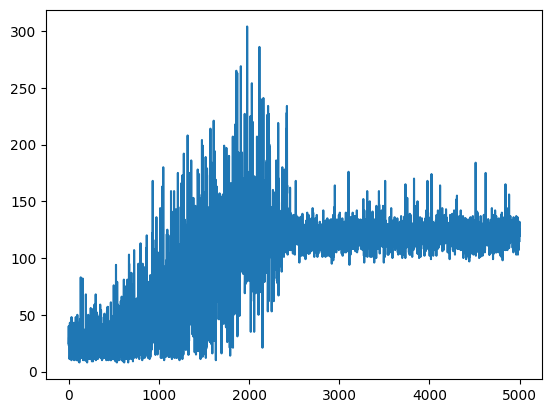

In [ ]:
#Using the Cart-pole environmment
#first since we are using SARSA we have to discretize the space
poleThetaSpace = np.linspace(-0.21,0.21,10)
poleVelSpace=np.linspace(-4,4,10)
cartPosSpace=np.linspace(-2.4,2.4,10)
cartVelSpace = np.linspace(-4,4,10)

#np.digitize() is used to assign index for each interval created using linspace and return whihc interval this number belongs to
def getState(obs):
  cartPos,cartVel,poleTheta,poleVel=obs
  cartVel=int(np.digitize(cartVel,cartVelSpace))
  cartPos=int(np.digitize(cartPos,cartPosSpace))
  poleTheta=int(np.digitize(poleTheta,poleThetaSpace))
  poleVel=int(np.digitize(poleVel,poleVelSpace))
  return (cartPos,cartVel,poleTheta,poleVel)

#maximum action extraction function
def maxAction(Q,s):
  values=np.array([Q[s,a]for a in range(2)])
  action=np.argmax(values)
  return action

#Create environment
env=gym.make('CartPole-v1')
#Model hyper-parameters
Alpha=0.1
Gamma=1.0
Eps=1.0
#Constructing the state-space
states=[]
for i in range(len(cartPosSpace)+1):
  for j in range(len(cartVelSpace)+1):
    for k in range(len(poleThetaSpace)+1):
      for l in range(len(poleVelSpace)+1):
        states.append((i,j,k,l))

Q={}

for s in states:
  for a in range(2):#left-0 and right-1
    Q[s,a]=0

numGames=5000
totRewards=np.zeros(numGames)
for i in range(numGames):
  done=False
  epRewards= 0
  obs=env.reset()
  while not done:
    s=getState(obs)
    rand=np.random.random()
    a=maxAction(Q,s) if rand < (1-Eps) else env.action_space.sample()#Following an epsilon- greedy Policy since this is a model-free method
    nextobs,reward,done,info=env.step(a)
    epRewards+=reward
    snext=getState(nextobs)
    rand=np.random.random()
    anext=maxAction(Q,snext) if rand < (1-Eps) else env.action_space.sample()#Following an epsilon- greedy Policy since this is a model-free method
    Q[s,a]=Q[s,a]+Alpha*(reward+Gamma*Q[snext,anext]-Q[s,a])
    obs=nextobs
  Eps-=2/(numGames) if Eps>0 else 0  #decreasing the epsilon value since after each iiteration the amount to be explored decreases significantly
  totRewards[i]=epRewards
plt.plot(totRewards)



**Q-learning**

It is a TD(0) type algorihtm but here it goes off policy that is follows action $a_t$ and when it reaches the next state it then selects the optimum Q-value. So it deviates from the policy . Now Q-learning is more optimum but it assumes we go through the optimum path SARSA onn the other hand assumes we are mmaking some exporation as we are walking through a path. This is why SARSA accounts for the risk due to exploration in it and is more optimum for Cliff-Walking type high pain states.

Q($s_t$,$a_t$)=Q($s_t$,$a_t$)+ α($r_{t+1}$ + γ. $max_a$Q($s_{t+1}$,a)-Q($s_t$,$a_t$))


**N-Step TD approach and TD(λ)**



**MAXIMIZATION BIAS**

Maximization bias arises because in Q-learning we assume that oncce it reaches the next state we take the action with the highest Q-value .This can be very diff from the actual value.

This also arises in SARSA because once it reaches the next state we proceed using an ϵ-greedy algorithm .Smaller the ϵ more is the maximization bias

**DOUBLE Q-LEARNING**

 Double Q-learning is a method to decrease the  maximization bias generated due to Q-learning.In this method we take half the number of samples to find the maximum action possible  and the other half of the samples to determine the value at the maximum action.

 This decreases the  error due to maximization bias significantly.

 Q1(s,a)=Q1(s,a)+α.(R+γ.Q2(s',$max_a$ (Q1(s',a)))-Q1(s,a))

  Q2(s,a)=Q2(s,a)+α.(R+γ.Q1(s',$max_a$ (Q2(s',a)))-Q2(s,a))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

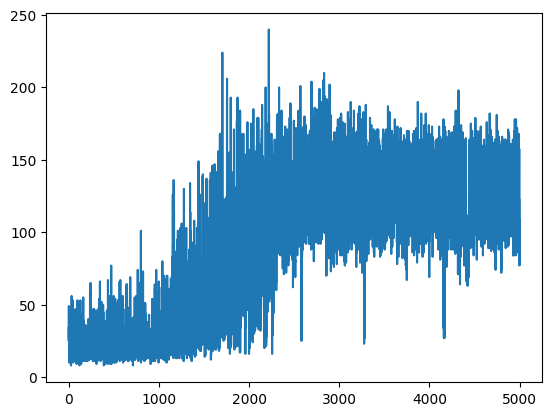

In [ ]:
#Using the Cart-pole environmment
#first since we are using Q-learning we have to discretize the space
poleThetaSpace = np.linspace(-0.21,0.21,10)
poleVelSpace=np.linspace(-4,4,10)
cartPosSpace=np.linspace(-2.4,2.4,10)
cartVelSpace = np.linspace(-4,4,10)

#np.digitize() is used to assign index for each interval created using linspace and return whihc interval this number belongs to
def getState(obs):
  cartPos,cartVel,poleTheta,poleVel=obs
  cartVel=int(np.digitize(cartVel,cartVelSpace))
  cartPos=int(np.digitize(cartPos,cartPosSpace))
  poleTheta=int(np.digitize(poleTheta,poleThetaSpace))
  poleVel=int(np.digitize(poleVel,poleVelSpace))
  return (cartPos,cartVel,poleTheta,poleVel)

#maximum action extraction function
def maxAction(Q1,Q2,s):
  values=np.array([Q1[s,a]+Q2[s,a]for a in range(2)])
  action=np.argmax(values)
  return action

#Create environment
env=gym.make('CartPole-v1')
#Model hyper-parameters
Alpha=0.1
Gamma=1.0
Eps=1.0
#Constructing the state-space
states=[]
for i in range(len(cartPosSpace)+1):
  for j in range(len(cartVelSpace)+1):
    for k in range(len(poleThetaSpace)+1):
      for l in range(len(poleVelSpace)+1):
        states.append((i,j,k,l))

Q1,Q2={},{}

for s in states:
  for a in range(2):#left-0 and right-1
    Q1[s,a]=0
    Q2[s,a]=0

numGames=5000
totRewards=np.zeros(numGames)
for i in range(numGames):
  done=False
  epRewards= 0
  obs=env.reset()
  while not done:
    s=getState(obs)
    rand=np.random.random()
    a=maxAction(Q1,Q2,s) if rand < (1-Eps) else env.action_space.sample()#Following an epsilon- greedy Policy since this is a model-free method
    nextobs,reward,done,info=env.step(a)
    epRewards+=reward
    snext=getState(nextobs)
    rand=np.random.random()
    if rand <=0.5:
      anext= maxAction(Q1,Q1,s)
      Q1[s,a]=Q1[s,a]+Alpha*(reward+Gamma*Q2[snext,anext]-Q1[s,a])#so while updating Q value how we proceed is we find best action to be taken for Q1 and find the corresponding Q2 for it
    else:
      anext= maxAction(Q2,Q2,s)
      Q2[s,a]=Q2[s,a]+Alpha*(reward+Gamma*Q1[snext,anext]-Q2[s,a])
    obs=nextobs
  Eps-=2/(numGames) if Eps>0 else 0  #decreasing the epsilon value since after each iiteration the amount to be explored decreases significantly
  totRewards[i]=epRewards
plt.plot(totRewards)



**DEEP Q-LEARNING**

-Implementing neural networks to get a relation between the reawrd and state-action pairs using function approximation.

 Q-Learning in its simplest form uses a table (Q-table) to represent state-actionvalues, i.e.Q-Values. The problem,however, becomes intractable as the number of states and
 actions increases . In general terms, the Q-value
 function can be estimated by function approximation. Since Neural Networks act
 as universal function approximators, they provide an
 excellent framework for Q-value estimation. Indeed, recent
 advances in Neural Networks applied to Q-learning have shown them to
 greatly outperform traditional RLmethods.The
 processof learning Q-value estimations is as follows:a teach
 iteration step i,approximated Q-values Q(sa; $𝜃_i$) are trained
 by Stochastic Gradient Descent,by minimizing the loss L( $𝜃_i$).


In [ ]:
import gym
import numpy as np
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
pip install swig


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.2 MB/s eta 0:00:00


In [ ]:
pip install Box2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.9/427.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Box2D: filename=Box2D-2.3.2-cp310-cp310-linux_x86_64.whl size=2394371 sha256=4ddd2a4fbbcad0fac6add6864cef3206034eaa17ab48bed73d9ab0c70ad9eb81
  Stored in directory: /root/.cache/pip/wheels/eb/cb/be/e663f3ce9aba6580611c0febaf7cd3cf7603f87047de2a52f9
Successfully built Box2D


In [ ]:
pip install Box2d-kengz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.4/425.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Box2d-kengz: filename=Box2D_kengz-2.3.3-cp310-cp310-linux_x86_64.whl size=2394326 sha256=49ec3c548fad1a93dcfca86438ea1d3decd61d0e563c8c7f4e89be43d9133030
  Stored in directory: /root/.cache/pip/wheels/ab/a3/5f/6396406aa0163da86c2a8d28304a120b55cfa98363654d853b
Successfully built Box2d-kengz


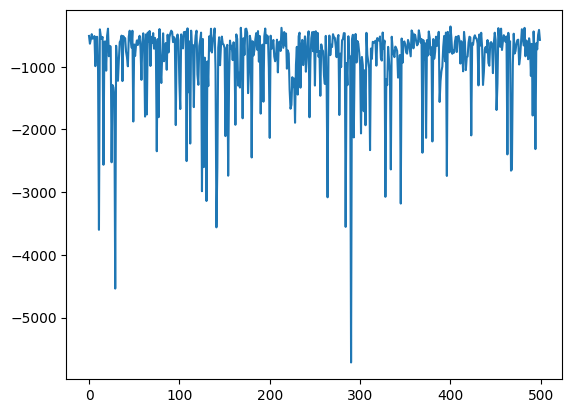

In [ ]:
class LinearDQN(nn.Module):
  def __init__(self, lr, n_actions, input_dims):
    super(LinearDQN, self).__init__()#instantiate our nn.Module
    self.fc1= nn.Linear(*input_dims, 128)#  the first layer in our DQN with 128 hidden dimensions
    self.fc2 = nn.Linear(128, n_actions)#the second layer in our DQN

    self.optimizer=optim.Adam(self.parameters(), lr=lr)#ADAM optimizer
    self.loss = nn.MSELoss()#Mean square error loss
    self.device = T.device('cpu')
    self.to(self.device)
  def forward(self,state):
    layer1=F.relu(self.fc1(state))
    actions=self.fc2(layer1)
    return actions

class Agent():
  def __init__(self,input_dims,n_actions,lr,gamma=1.0,epsilon=0.01,eps_dec=1e-4,eps_min=0.00001):
    self.lr  = lr
    self.input_dims = input_dims
    self.n_actions = n_actions
    self.gamma = gamma
    self.epsilon = epsilon
    self.eps_dec = eps_dec
    self.eps_min = eps_min
    self.action_space=[i for i in range(self.n_actions)]

    self.Q = LinearDQN(self.lr,self.n_actions,self.input_dims)
  def choose_action(self,obs):#choosing an action epsilon-greedily
    if np.random.random() > self.epsilon:
      state = T.tensor(obs,dtype=T.float).to(self.Q.device)
      actions=self.Q.forward(state)
      action=T.argmax(actions).item()
    else:
      action = np.random.choice(self.action_space)
    return action
  def decrement_epsilon(self):#decrementing the epsilon value  after each episode
    self.epsilon =self.epsilon-self.eps_dec if self.epsilon >self.eps_min else self.eps_min
  def learn(self,state,action, reward, state_):
    self.Q.optimizer.zero_grad()
    states = T.tensor(state,dtype=T.float).to(self.Q.device)
    actions = T.tensor(action).to(self.Q.device)
    rewards = T.tensor(reward).to(self.Q.device)
    states_ = T.tensor(state_,dtype=T.float).to(self.Q.device)

    q_pred=self.Q.forward(states)[actions]

    q_next=self.Q.forward(states_).max()

    q_target= reward + self.gamma*q_next

    loss= self.Q.loss(q_target, q_pred).to(self.Q.device)
    loss.backward()
    self.Q.optimizer.step()
    self.decrement_epsilon()
if __name__=='__main__':
  env=gym.make('LunarLander-v2')
  n_games=500
  avg_score=[]
  scores=[]
  eps_history = []
  agent=Agent(input_dims=env.observation_space.shape,
              n_actions=env.action_space.n,
              lr=0.00001)
  for  i in range(n_games):
    done=False
    score=0
    obs=env.reset()
    while not done:
      action = agent.choose_action(obs)
      obs_,reward,done,info = env.step(action)
      score += reward
      agent.learn(obs, action, reward, obs_)
      obs=obs_
    eps_history.append(agent.epsilon)
    scores.append(score)
plt.plot(scores)

**Policy Search Algorithms**

In the setting of function approximation policy  search methods are much better
than value functions.
Similarly when action is continuous it is better to evaluate via policy gradient algorithms. If we evaluate with Value based algorithms we will have to discretize it as bins.

Reason:
 1. Simpler description
 2. Better Convergence
 3. When state is not fully observable(state may contain a lot  of variables)

Two classes of Policy Search Algorithms:
  1. Direct Policy Searcch(via Genetic Algorithms)
  2. Policy Gradient Algorithms




**POLICY GRADIENT ALGORITHMS**

Policy depends on some policy parameters(θ).In this method instead of modifying action values we modify these policy parameters.

Maximize J(θ)=E($r_t$)
Done by Gradient ascent

**θ=θ+α.∇J(θ)**

  J(θ)=$Σ_a$ $π_θ$(a).$q_*$(a)     where $q_*$(a) is the true reward   



  ∇J(θ)=$Σ_a$ $q_*$(a). $π_θ$(a) . (∇$π_θ$(a)/$π_θ$(a))

where (∇$π_θ$(a)/$π_θ$(a)) is the  likelihood ratio

now since we dont know $q_*$(a) we can approximate:

 J(θ)=E($r_t$)=$Σ^N$$r_i$/N

 ∇J(θ)=$Σ^N$$r_i$. (∇$π_θ$($a_i$)/$π_θ$($a_i$))/N








**REINFORCE**

Instead of Sampling and finding the expected value of the return we can proceed with any action and still reach convergence

𝚫$θ_t$=α.$r_t$.(∇$π_θ$($a_t$)/$π_θ$($a_t$))

𝚫$θ_t$=α.$r_t$.∂(ln($π_θ$($a_t$)))/∂θ

With Baseline

𝚫$θ_t$=α.($r_t$-$b_t$).∂(ln($π_θ$($a_t$)))/∂θ


∂(ln($π_θ$($a_t$)))/∂θ is the characteristic eligibility


**POLICY GRADIENT THEOREM**


**∇J(θ) ∝ $𝚺_s$μ(s).$𝚺_a$ $q_π$($s$,a).∇ π(a|$s$)**

In an episodic case assuming we always start with state $s_0$


J(θ)=$v_π$($s_0$)

∇J(θ)=∇ (Σ $q_π$($s_0$,a).π(a|$s_0$))= Σ∇π(a|$s_0$).$q_π$($s_0$,a) +Σπ(a|$s_0$).∇$q_π$($s_0$,a)

= Σ∇π(a|$s_0$).$q_π$($s_0$,a) +Σπ(a|$s_0$).Σp(s|$s_0$,a)∇$v_π$(s)

=$𝚺_s$ $𝚺_k$ (prob($s_0$->s,k,π)).$𝚺_a$ $q_π$($s$,a).∇ π(a|$s$)        

$𝚺_k$ (prob($s_0$->s,k,π))=η(s) prob.to reach state s from s0 in any number of steps

∇J(θ)=$𝚺_s$η(s).$𝚺_a$ $q_π$($s$,a).∇ π(a|$s$)
=$Σ_s'$η(s').$𝚺_s$η(s)/($Σ_s'$η(s')).$𝚺_a$ $q_π$($s$,a).∇ π(a|$s$)

∇J(θ) ∝ $𝚺_s$η(s)/($Σ_s'$η(s')).$𝚺_a$ $q_π$($s$,a). ∇ π(a|$s$)

**∇J(θ) ∝ $𝚺_s$μ(s).$𝚺_a$ $q_π$($s$,a).∇ π(a|$s$)**

μ(s)->relative amount of time spent in state s


**ACTOR CRITIC ALGORITHMS**

Hybrid approach containing value-based and policy based approaches integrated into one.

Actor: The actor makes decisions by selecting actions based on the current policy. Its responsibility lies in exploring the action space to maximize expected cumulative rewards. By continuously refining the policy, the actor adapts to the dynamic nature of the environment.

Critic: The critic evaluates the actions taken by the actor. It estimates the value or quality of these actions by providing feedback on their performance. The critic’s role is pivotal in guiding the actor towards actions that lead to higher expected returns, contributing to the overall improvement of the learning process.

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumP

Episode  10 Reward 21.000000 Average Reward 37.600000
Episode  20 Reward 26.000000 Average Reward 50.100000
Episode  30 Reward 82.000000 Average Reward 59.800000
Episode  40 Reward 193.000000 Average Reward 123.000000
Episode  50 Reward 133.000000 Average Reward 132.300000
Episode  60 Reward 229.000000 Average Reward 137.200000
Episode  70 Reward 115.000000 Average Reward 96.900000
Episode  80 Reward 75.000000 Average Reward 84.300000
Episode  90 Reward 80.000000 Average Reward 85.300000
Episode  100 Reward 67.000000 Average Reward 73.400000
Episode  110 Reward 57.000000 Average Reward 92.500000
Episode  120 Reward 75.000000 Average Reward 96.700000
Episode  130 Reward 156.000000 Average Reward 143.100000
Episode  140 Reward 146.000000 Average Reward 160.300000
Episode  150 Reward 68.000000 Average Reward 67.000000
Episode  160 Reward 148.000000 Average Reward 89.100000
Episode  170 Reward 68.000000 Average Reward 81.600000
Episode  180 Reward 101.000000 Average Reward 90.200000
Episod

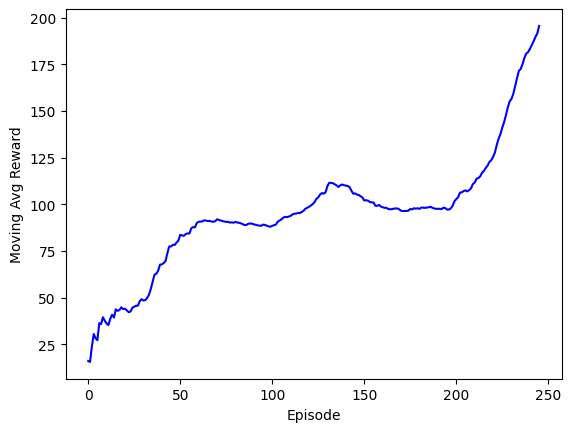

In [23]:
import scipy
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, deque
import torch.optim as optim
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
class ActorCriticModel(tf.keras.Model):#using same network to implement both actor and critic networks
    def __init__(self, action_size, n_hidden1=1024, n_hidden2=512):
        super(ActorCriticModel, self).__init__()#instantiate the tf.keras.Model

        #Hidden Layer 1
        self.fc1 = tf.keras.layers.Dense(n_hidden1, activation='relu')#first layer of neurons with relu activation function
        #Hidden Layer 2
        self.fc2 = tf.keras.layers.Dense(n_hidden2, activation='relu')#2nd layer of neurons with relu activation

        #Output Layer for policy
        self.pi_out = tf.keras.layers.Dense(action_size, activation='softmax')#softmax activation for the policy parameters
        #Output Layer for state-value
        self.v_out = tf.keras.layers.Dense(1)#no activation function required for the value parameters

    def call(self, state):
        layer1 = self.fc1(state)
        layer2 = self.fc2(layer1)

        pi = self.pi_out(layer2)
        v = self.v_out(layer2)

        return pi, v
class Agent:
    def __init__(self, action_size, lr=0.001, gamma=0.99, seed = 85):
        self.gamma = gamma #df
        self.ac_model = ActorCriticModel(action_size=action_size)
        self.ac_model.compile(tf.keras.optimizers.Adam(learning_rate=lr))#Adam optimizer
        np.random.seed(seed)#setting a seed for  neural network

    def sample_action(self, state):# function to sample actions and also compute the policy for  a given statee
        pi,_ = self.ac_model(state)

        action_probabilities = tfp.distributions.Categorical(probs=pi) #Categorical distribution created for action probabilities
        sample = action_probabilities.sample()

        return int(sample.numpy()[0])

    def actor_loss(self, action, pi, delta):
        return -tf.math.log(pi[0,action]) * delta #computing loss of actor

    def critic_loss(self,delta):
        return delta**2 #computinng loss of critic

    @tf.function
    def learn(self, state, action, reward, next_state, done):
        with tf.GradientTape(persistent=True) as tape:#tf.GradientTape is a context manager that records the operations performed on tensors. tf.GradientTape can track any tensor that is watched, either explicitly or implicitly
            pi, V_s = self.ac_model(state)
            _, V_s_next = self.ac_model(next_state)

            V_s = tf.squeeze(V_s)
            V_s_next = tf.squeeze(V_s_next)



            delta = reward + self.gamma*V_s_next - V_s #TD Error
            loss_a = self.actor_loss(action, pi, delta) #actor loss
            loss_c =self.critic_loss(delta) #Critic loss
            loss_total = loss_a + loss_c #total loss  is loss of actor network and critic network

        gradient = tape.gradient(loss_total, self.ac_model.trainable_variables)
        #the tape.gradient() or tape.jacobian() method to compute the gradient or jacobian of your function or model with respect to your variables or tensors or in this case the model
        self.ac_model.optimizer.apply_gradients(zip(gradient, self.ac_model.trainable_variables))
        #optimizer
env = gym.make('CartPole-v1')#Using Cartpole Environment

#Initializing Agent
agent = Agent(lr=1e-4, action_size=env.action_space.n)
#Number of episodes
episodes = 1000
tf.compat.v1.reset_default_graph()

reward_list = []
average_reward_list = []


for ep in range(1, episodes + 1):
    state = env.reset().reshape(1,-1)
    done = False
    ep_rew = 0
    while not done:
        action = agent.sample_action(state) ##Sample Action
        next_state, reward, done, info = env.step(action) ##Take action
        next_state = next_state.reshape(1,-1)
        ep_rew += reward  ##Updating episode reward
        agent.learn(state, action, reward, next_state, done) ##Update Parameters
        state = next_state ##Updating State
    reward_list.append(ep_rew)

    if ep % 10 == 0:
        avg_rew = np.mean(reward_list[-10:])
        print('Episode ', ep, 'Reward %f' % ep_rew, 'Average Reward %f' % avg_rew)

    if ep % 100:
        avg_100 =  np.mean(reward_list[-100:])
        if avg_100 > 150.0:
            print('Stopped at Episode ',ep-100)
            break




avg_rew = [np.mean(reward_list[max(0,i-100):i]) for i in range(1,len(reward_list)+1)]

plt.figure()
plt.plot(np.arange(len(avg_rew)), avg_rew, 'b')
plt.xlabel('Episode')
plt.ylabel('Moving Avg Reward')
plt.show()